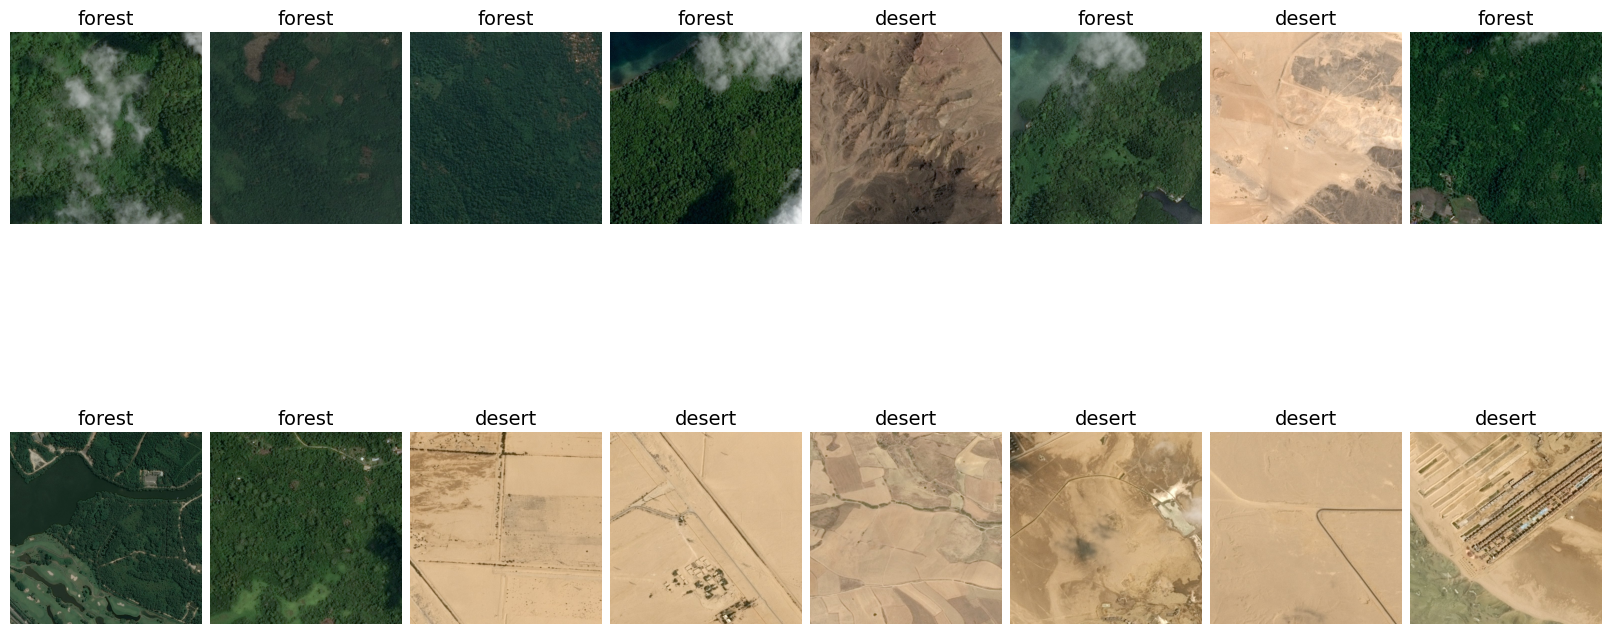

In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline

def process2gray(image):  
    '''
    Переводит изображение в серый цвет

    :param image: изображение леса или пустыни  
    :return: серое изображение
    '''
    h, w, _ = image.shape
    image = cv2.resize(image.copy(), (w // 2, h // 2))
    image = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)

    gray = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY)
    return gray

def image_class(hist):    
    '''
    Определяет лес или пустыня на фотоснимке

    :param hist: гистограмма изображения леса или пустыни
    :return: "desert", если на изображении пустыня, иначе - "forest"
    '''
    desert_threshhold = 60000 #Подбирался вручную (можно и точнее)
    #Берем интервал [0:100]. леса как правило более темные чем пустыни
    if(np.sum(hist[0:100]) < desert_threshhold):
        return "desert"
    else:
        return "forest"
    
    
#Считываем изображения
images = list()

for i in range(16):
    if(i < 10):
        image = cv2.imread(f'desert_forest/test_image_0{i}.jpg')        
    else:
        image = cv2.imread(f'desert_forest/test_image_{i}.jpg')              
    images.append(image)

#Список серых изображений
grays = list()
for i in range(16):
    grays.append(process2gray(images[i]))

#Список гистограмм
hists = list()
for i in range(16):
    hist = cv2.calcHist([grays[i].ravel()], [0], None, [256], [0, 256])
    hists.append(hist)

#Классифицируем изображения
photo_classes = list()

for i in range(16):
    photo_class = image_class(hists[i])
    if (photo_class == 'desert'):
        photo_classes.append('desert')
    else:
        photo_classes.append('forest')

plt.figure(figsize=(16, 8), constrained_layout=True)

for i, img in enumerate(images):
    plt.subplot(2, len(images) // 2, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))   
    if(photo_classes[i] == 'forest'):
        plt.title('forest', fontsize=14)        
    else:
        plt.title('desert', fontsize=14)
    plt.axis('off')

plt.show()